In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
import collections

In [2]:
listings = pd.read_csv('data/listings.csv')
reviews = pd.read_csv('data/reviews.csv')
calendar = pd.read_csv('data/calendar.csv')

In [3]:
def returntruefalse(x,i):
    if i in x:
        return 1
    else:
        return 0
    
x = ["listing_url","scrape_id","last_scraped","name","summary","space","description","experiences_offered",
     "neighborhood_overview", "notes","transit","thumbnail_url","medium_url","picture_url","xl_picture_url","host_id",
    "host_url","host_name","host_since","host_location","host_about","host_thumbnail_url","host_picture_url",
    "host_neighbourhood","host_listings_count","host_total_listings_count","host_response_time",
    "street","neighbourhood","neighbourhood_cleansed","city","state","zipcode","market","smart_location","country_code",
    "country","is_location_exact","square_feet","calendar_updated","has_availability","calendar_last_scraped","requires_license","license","jurisdiction_names",
     "require_guest_profile_picture","require_guest_phone_verification","calculated_host_listings_count",
     "first_review" , "last_review","reviews_per_month","host_verifications","weekly_price","monthly_price","security_deposit","cleaning_fee"]

listings = listings.drop(columns= x)


listings['host_response_rate'] = listings['host_response_rate'].str.replace("%", "").astype("float")
listings['host_response_rate'].fillna(listings['host_response_rate'].mean(),inplace = True)

listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace("%", "").astype("float")
listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mean(),inplace = True)

listings['price'] = listings['price'].str.replace(",", "")
listings['price'] = listings['price'].str.replace("$", "").astype("float")

listings['extra_people'] = listings['extra_people'].str.replace(",", "")
listings['extra_people']=listings['extra_people'].str.replace('$','').astype("float")
    

listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].mode()[0])
listings['beds'] = listings['beds'].fillna(listings['beds'].mode()[0])
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mode()[0])

#reviewColumns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
 #                        'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
  #                      'review_scores_value']
#for column in reviewColumns:
 #   listings[column].fillna(round(listings[column].mean(),2), inplace = True)

    
listings['host_is_superhost'].replace('f', 0 ,inplace=True)
listings['host_is_superhost'].replace('t', 1 ,inplace=True)
listings['host_is_superhost'] = listings['host_is_superhost'].fillna(0)

listings['instant_bookable'].replace('f', 0 ,inplace=True)
listings['instant_bookable'].replace('t', 1 ,inplace=True)
listings['instant_bookable'] = listings['instant_bookable'].fillna(0)

    
listings['host_has_profile_pic'].replace('f', 0 ,inplace=True)
listings['host_has_profile_pic'].replace('t', 1 ,inplace=True)
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].fillna(0)

listings['host_identity_verified'].replace('f', 0 ,inplace=True)
listings['host_identity_verified'].replace('t', 1 ,inplace=True)
listings['host_identity_verified'] = listings['host_identity_verified'].fillna(0)

# Exploratory Data Analysis

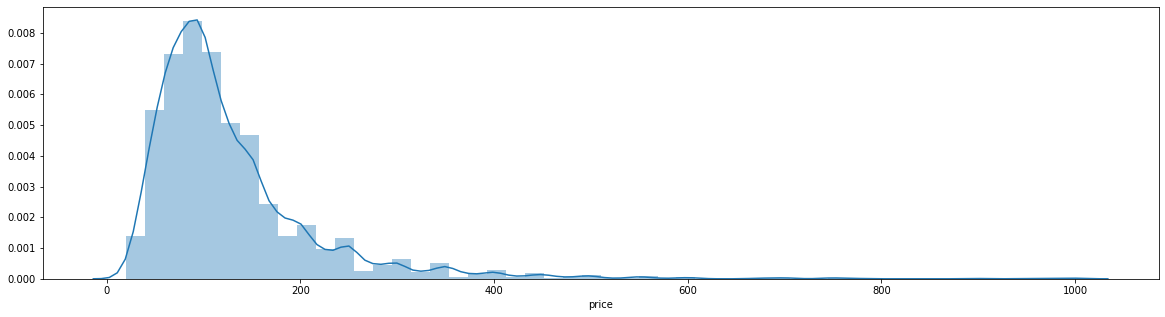

In [4]:
plt.figure(figsize=(20,5))
sb.distplot(listings["price"]);
plt.show()

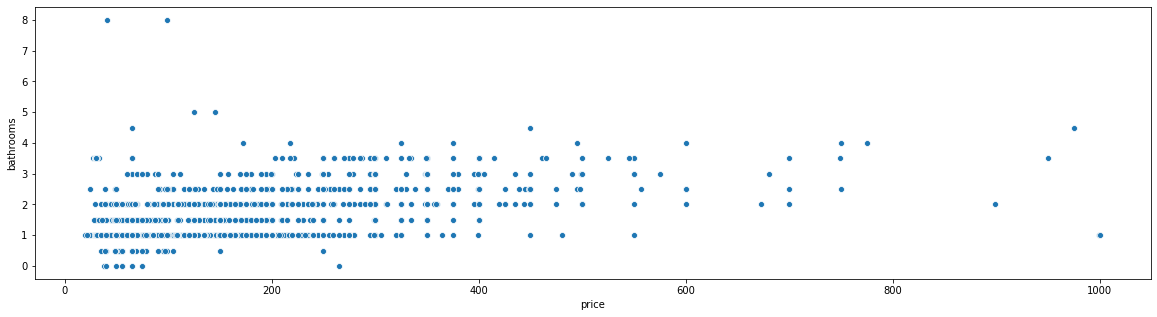

In [5]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='bathrooms',data=listings)
plt.show()

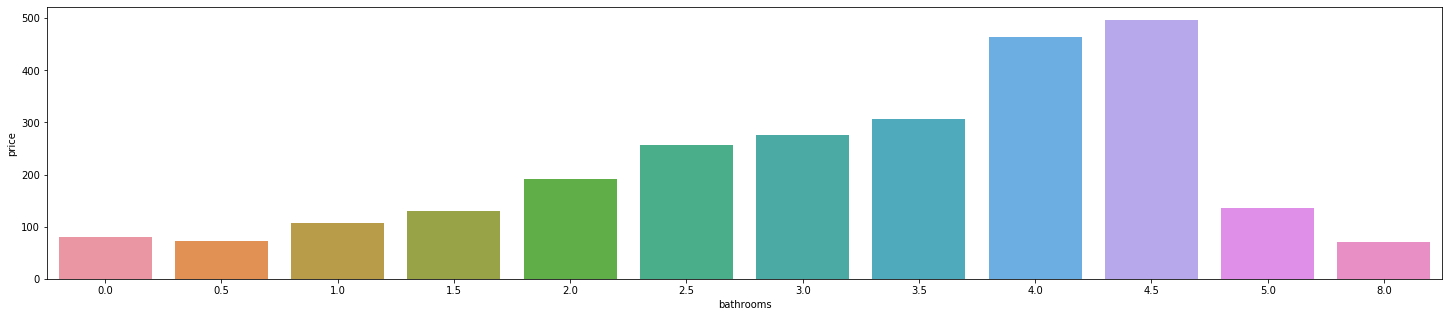

In [6]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("bathrooms").mean()['price']).reset_index(), x = "bathrooms" , y = "price" )
plt.show()

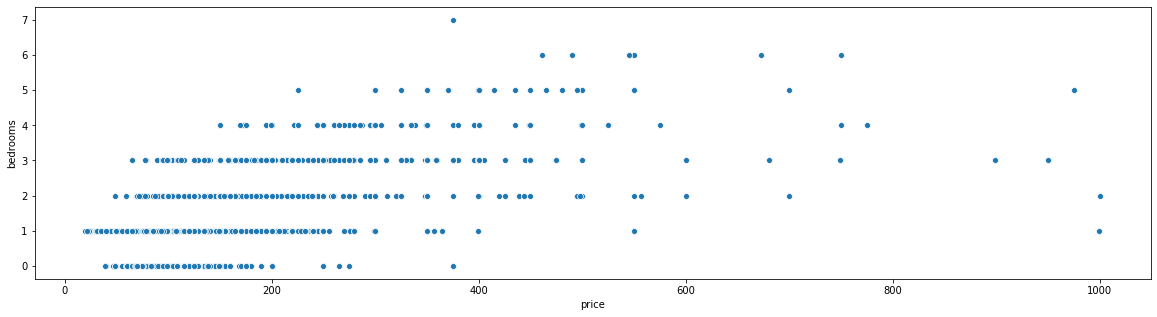

In [7]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='bedrooms',data=listings)
plt.show()

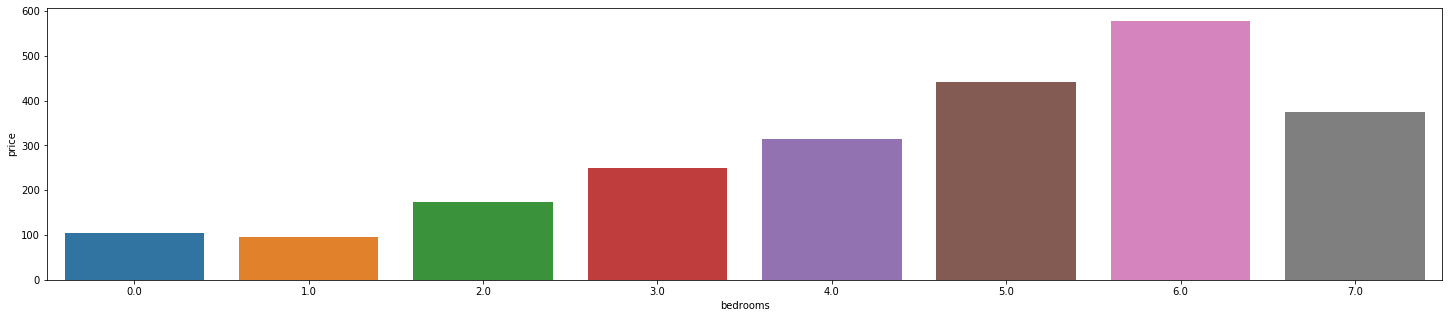

In [8]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("bedrooms").mean()['price']).reset_index(), x = "bedrooms" , y = "price" )
plt.show()

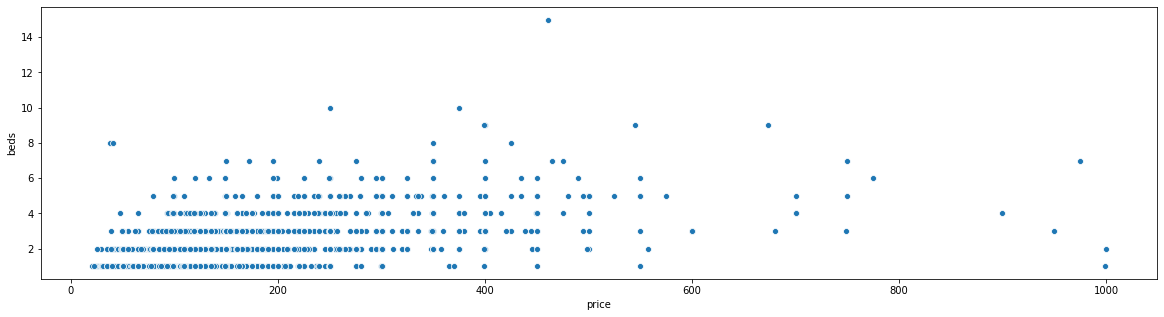

In [9]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='beds',data=listings)
plt.show()

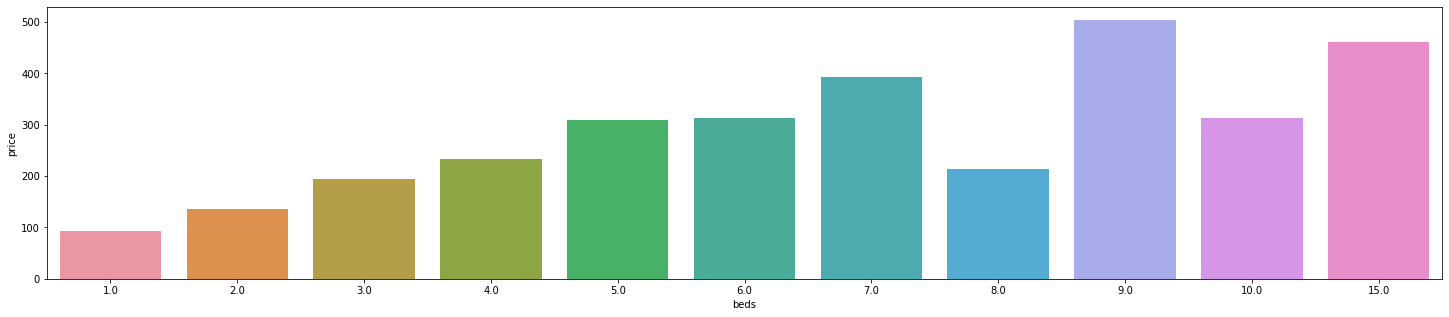

In [10]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame( listings.groupby("beds").mean()['price']).reset_index(), x = "beds" , y = "price" )
plt.show()

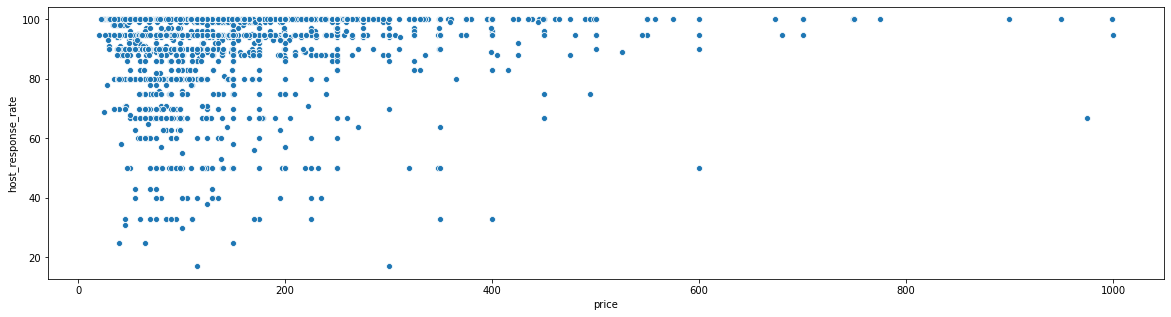

In [11]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='host_response_rate',data=listings)
plt.show()

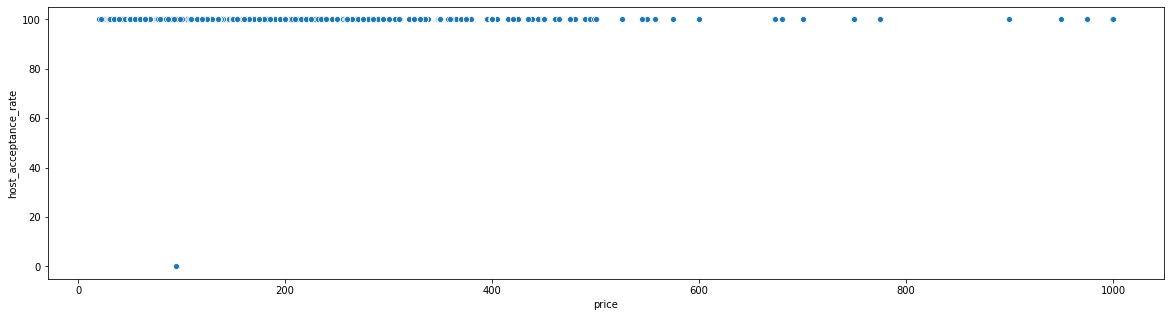

In [12]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='host_acceptance_rate',data=listings)
plt.show()

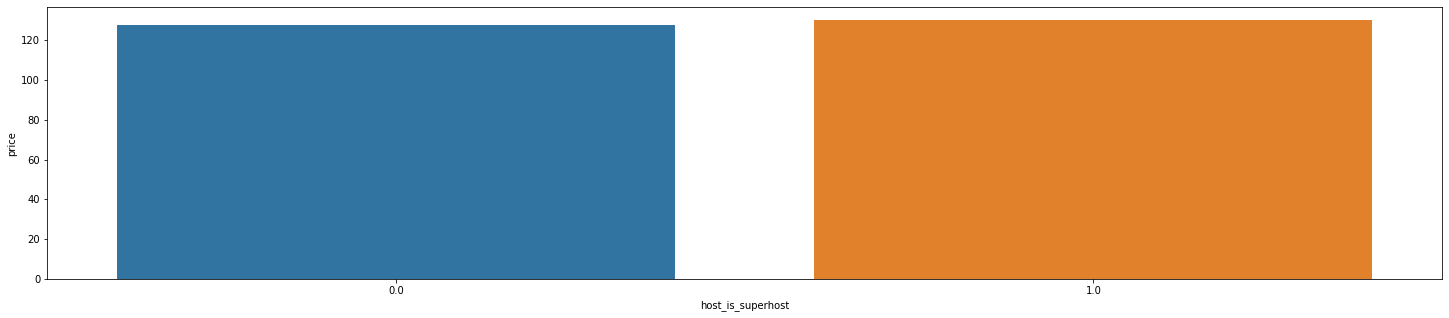

In [13]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("host_is_superhost").mean()['price']).reset_index(), x = "host_is_superhost" , y = "price" )
plt.show()

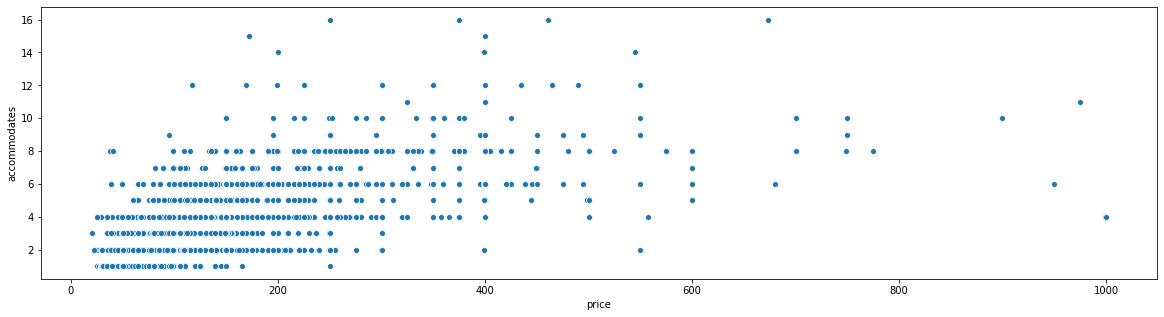

In [14]:
plt.figure(figsize=(20,5))
sb.scatterplot(x='price',y='accommodates',data=listings)
plt.show()

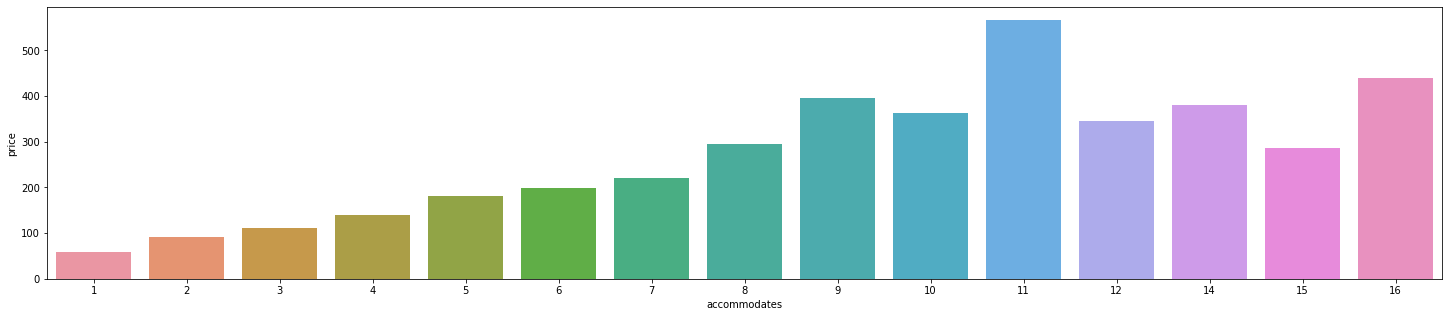

In [15]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("accommodates").mean()['price']).reset_index(), x = "accommodates" , y = "price" )
plt.show()

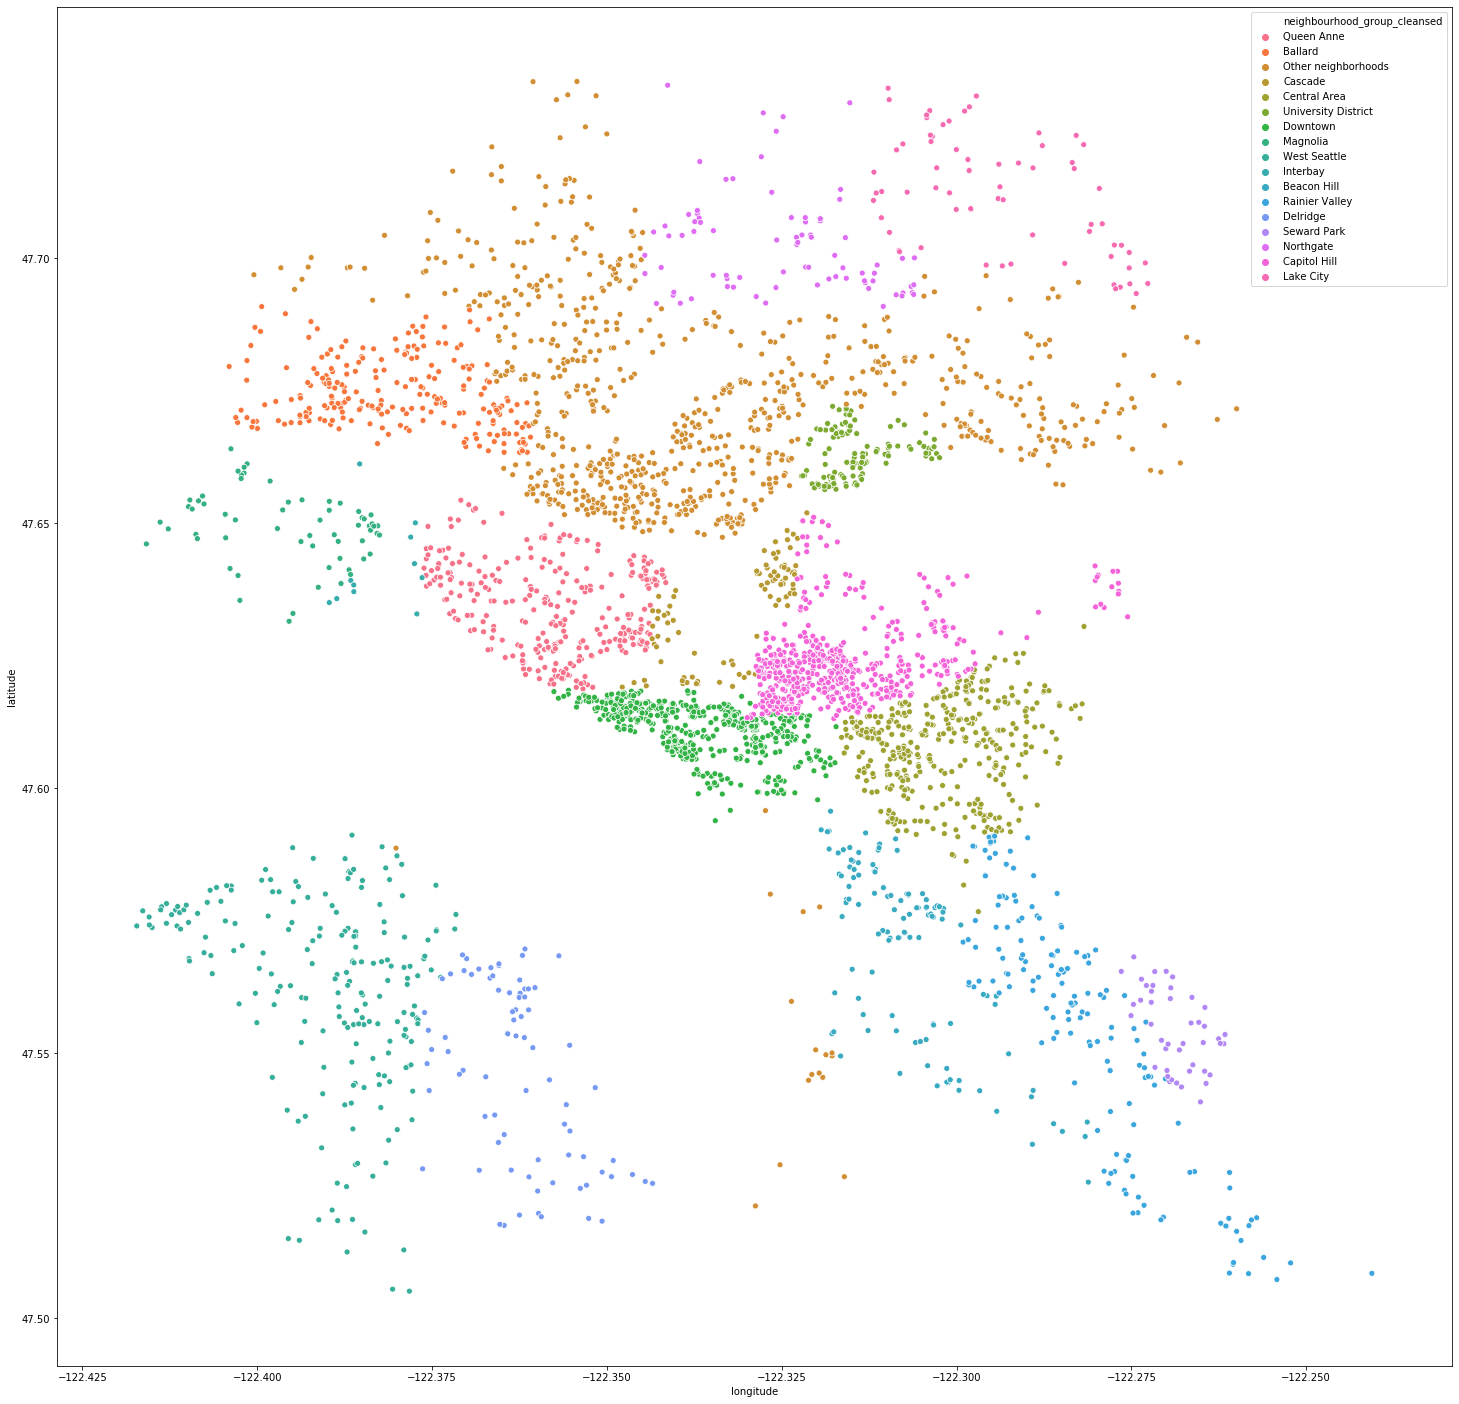

In [16]:
plt.figure(figsize=(25,25))
sb.scatterplot(listings["longitude"],listings["latitude"],hue=listings["neighbourhood_group_cleansed"])
plt.show()

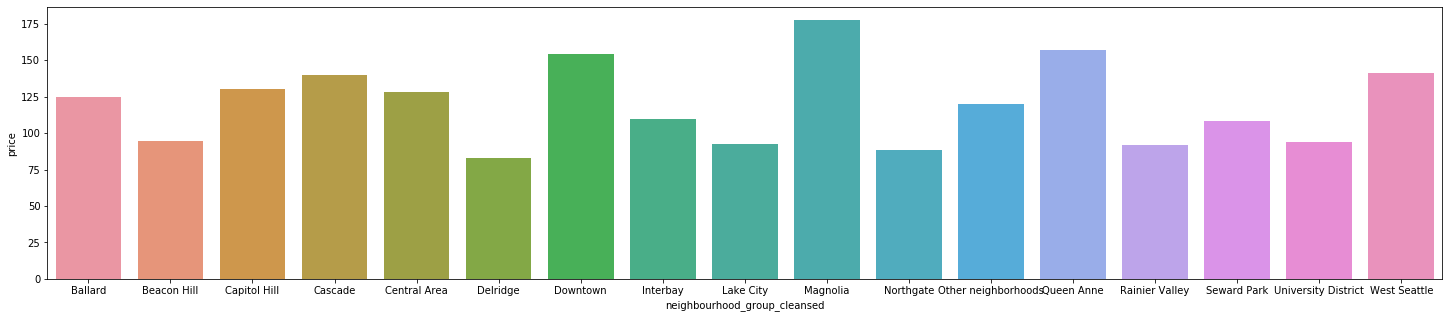

In [17]:
data_groupbyNeighbour = listings.groupby("neighbourhood_group_cleansed")
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(data_groupbyNeighbour.mean()["price"]).reset_index(), x = "neighbourhood_group_cleansed" , y = "price" )
plt.show()

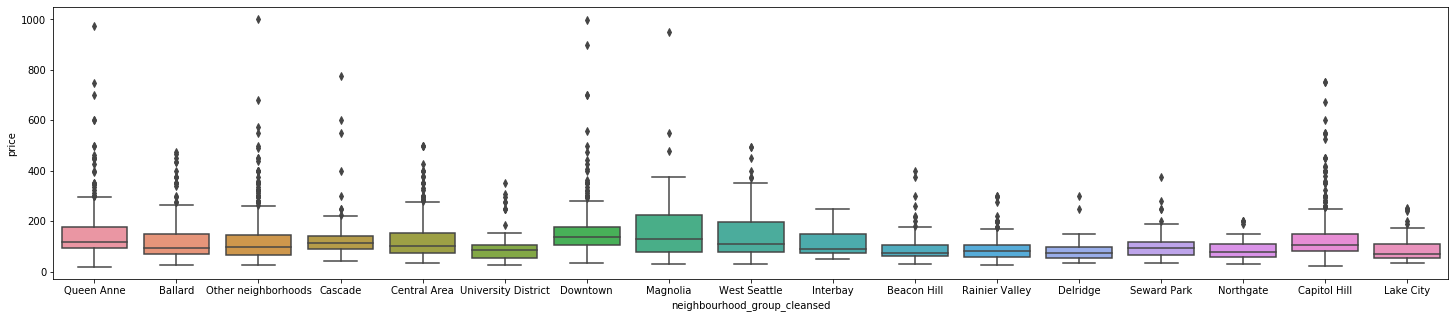

In [18]:
plt.figure(figsize=(25,5))
sb.boxplot(y="price",x ='neighbourhood_group_cleansed' ,data = listings)
plt.show()

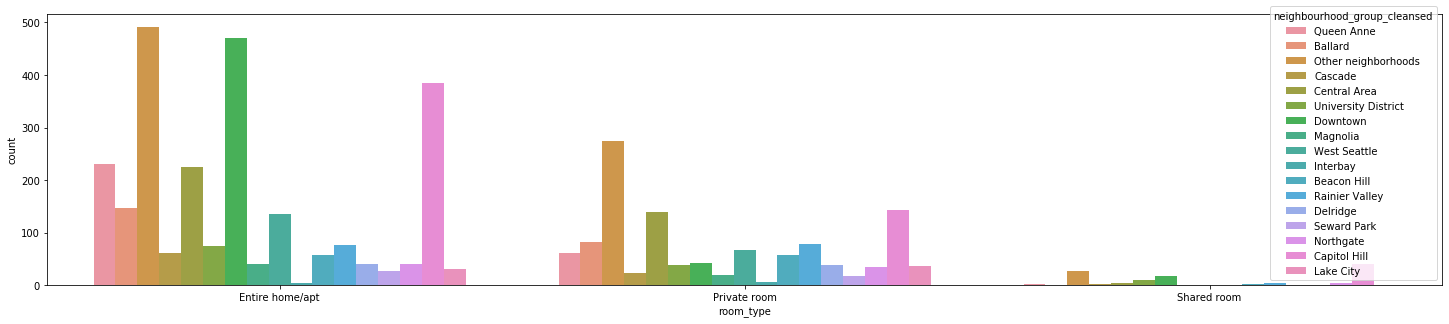

In [19]:
plt.figure(figsize=(25,5))
sb.countplot(x = 'room_type',hue = "neighbourhood_group_cleansed",data = listings)
plt.show()

<Figure size 1800x360 with 0 Axes>

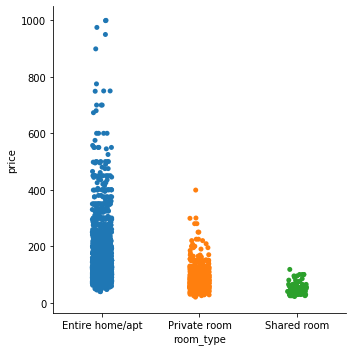

In [20]:
plt.figure(figsize=(25,5))
sb.catplot(x="room_type", y="price", data=listings);
plt.show()

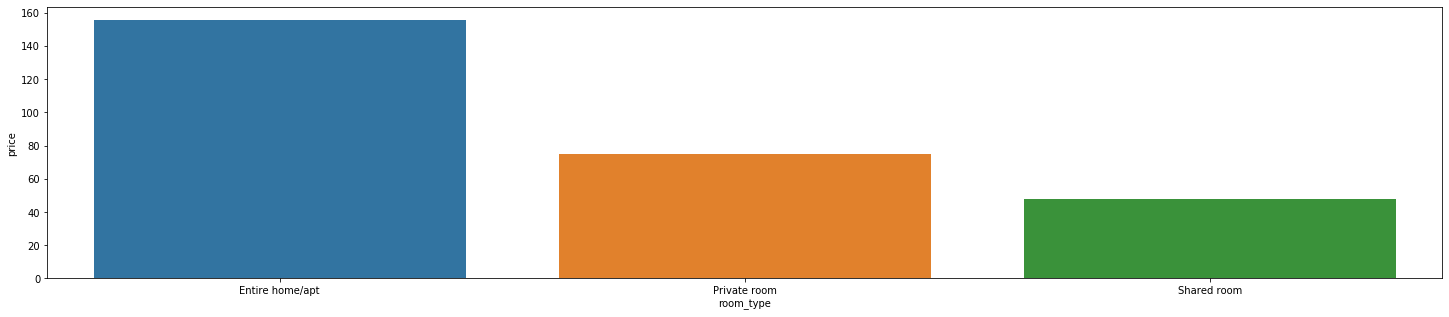

In [21]:
plt.figure(figsize=(25,5))
sb.barplot(data=pd.DataFrame(listings.groupby("room_type").mean()['price']).reset_index(), x = "room_type" , y = "price" )
plt.show()

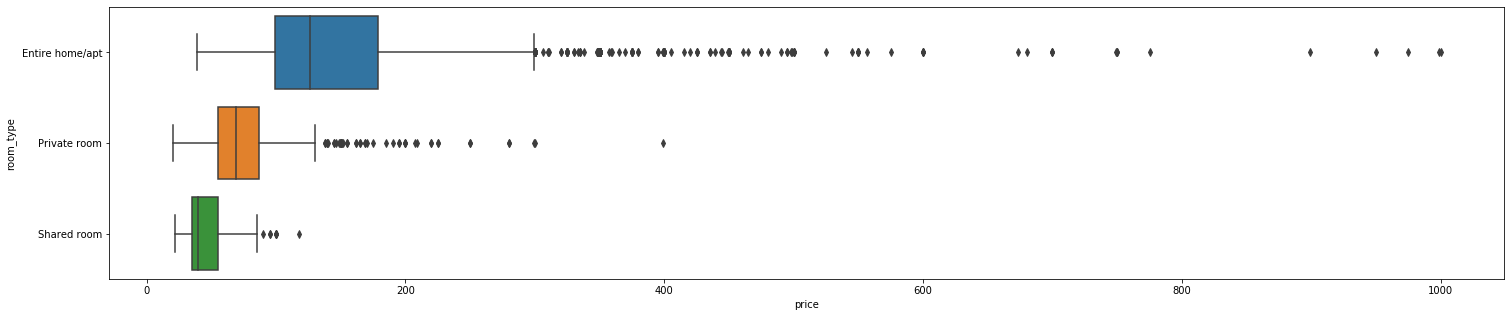

In [22]:
plt.figure(figsize=(25,5))
sb.boxplot(x="price",y ='room_type' ,data = listings)
plt.show()

In [23]:
arrowDF=listings.copy()

amenitieslist1=[]
for i in arrowDF.amenities.tolist():
    temp=i.replace('\"','')
    temp=temp.replace('{','')
    temp=temp.replace('}','')
    amenitieslist1.append(temp.split(','))   
amenitieslist2 = []
for i in amenitieslist1:
    for j in i:
        amenitieslist2.append(j)   
amenitiesCount = collections.Counter(amenitieslist2)
amenitiesCountDict = dict(amenitiesCount)

In [24]:
count_dict = {'amenities_available': list(amenitiesCountDict.keys()), 'num_amenities': list(amenitiesCountDict.values())}
amenitiesCountDF = pd.DataFrame.from_dict(count_dict)
amenitiesCountDF[amenitiesCountDF['amenities_available'] == ''] = np.nan
amenitiesCountDF.sort_values(by = 'num_amenities', ascending = False,inplace=True)
amenitiesCountDF.dropna()

,amenities_available,num_amenities
3,Wireless Internet,3667.0
6,Heating,3627.0
5,Kitchen,3423.0
12,Smoke Detector,3281.0
17,Essentials,3237.0
9,Dryer,2997.0
8,Washer,2992.0
2,Internet,2811.0
24,Shampoo,2670.0
0,TV,2574.0


In [25]:
clean_listings=arrowDF.copy()
for i in amenitiesCountDF['amenities_available']:
        if(type(i)!=str):
            break
        else:
            clean_listings[i]=arrowDF['amenities'].apply(lambda x:(returntruefalse(x,i)))


# Prediction of Price

In [26]:
## with amenities
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x =listings[["bathrooms","bedrooms","neighbourhood_group_cleansed","room_type","host_response_rate" , "host_acceptance_rate" , "host_is_superhost" , "accommodates"]]
# Extract Response and Predictors
y = np.log1p(listings['price'])

amenitiesCol = []
for i in amenitiesCountDF['amenities_available']:
    if(type(i)!=str):
            break
    else:
            amenitiesCol.append(i)
amenitiesCol_df = pd.DataFrame(clean_listings[amenitiesCol])

x = x.join(amenitiesCol_df)
one_hot = pd.get_dummies(x['neighbourhood_group_cleansed'])
x = pd.concat([x,one_hot] , axis = 1)
x = x.drop(['neighbourhood_group_cleansed'] , axis=1)

one_hot = pd.get_dummies(x['room_type'])
x = pd.concat([x,one_hot] , axis = 1)
x = x.drop(['room_type'] , axis=1)
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [27]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

y_test_pred = linreg.predict(x_test)

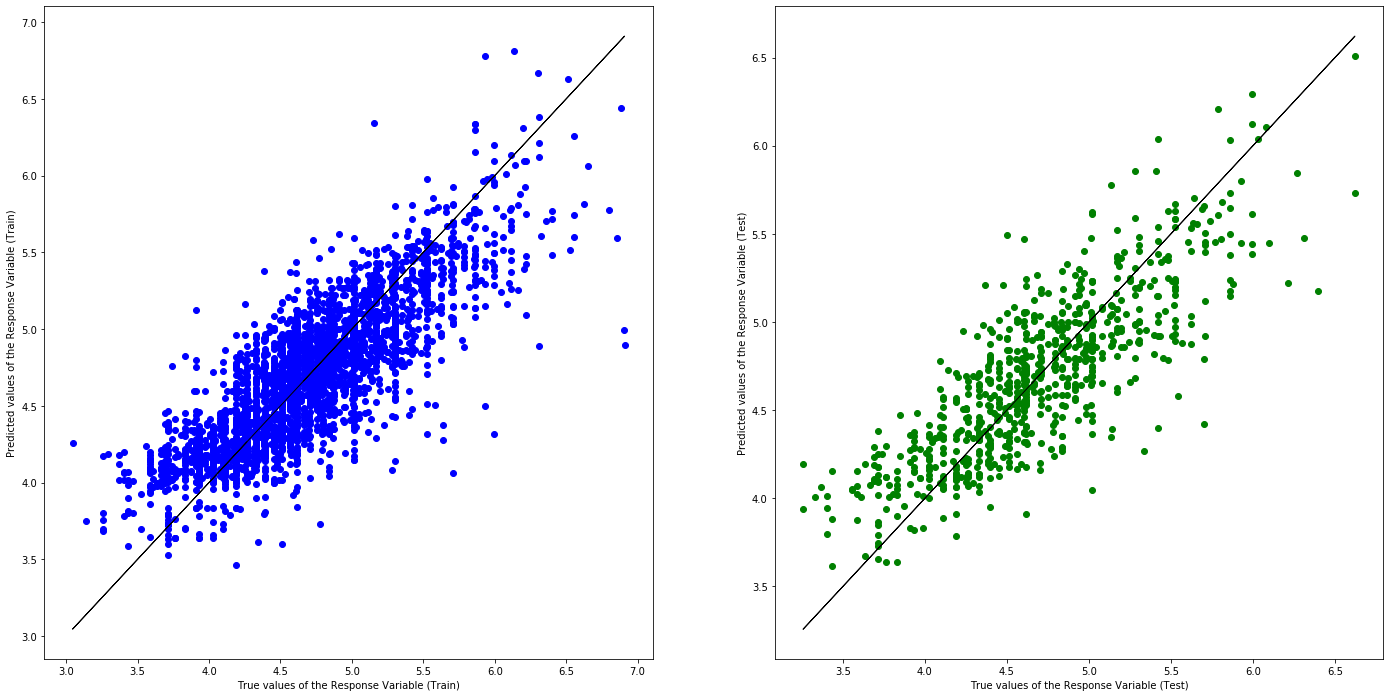

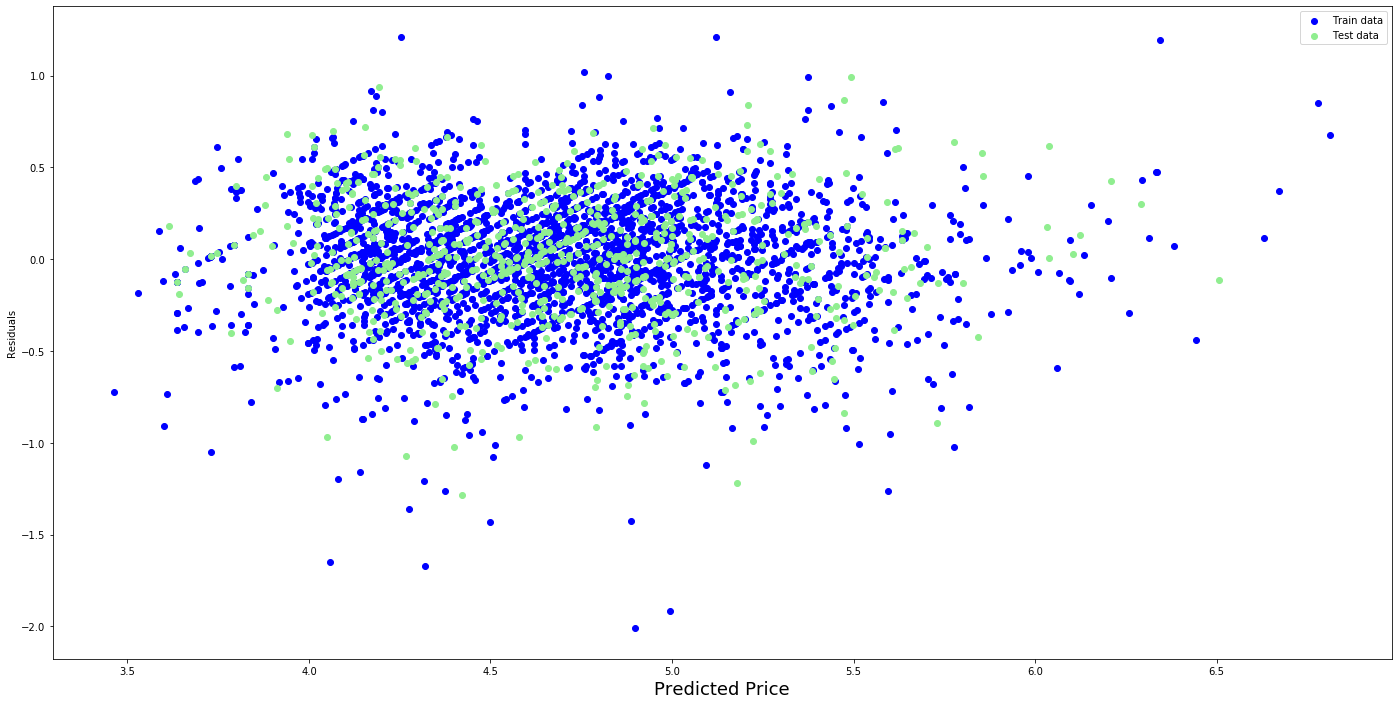

Explained Variance (R^2) on Train Set 	: 0.6744957457026904
Explained Variance (R^2) on Test Set 	: 0.6705944867078723


In [28]:
y_train_pred = linreg.predict(x_train)
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price', fontsize=18)
plt.ylabel('Residuals')

plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))

# Random Forest Regression

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

In [30]:
rf= RandomForestRegressor(random_state=1, n_jobs=-1, max_features='log2')

param_grid = dict(n_estimators=[3000,4000,5000],
                  max_depth=[None, 4],
                  min_samples_leaf=[1,2])

grid_rf =GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_rf.fit(x_train,y_train)


rf = grid_rf.best_estimator_

y_test_pred = rf.predict(x_test)
y_train_pred = rf.predict(x_train)


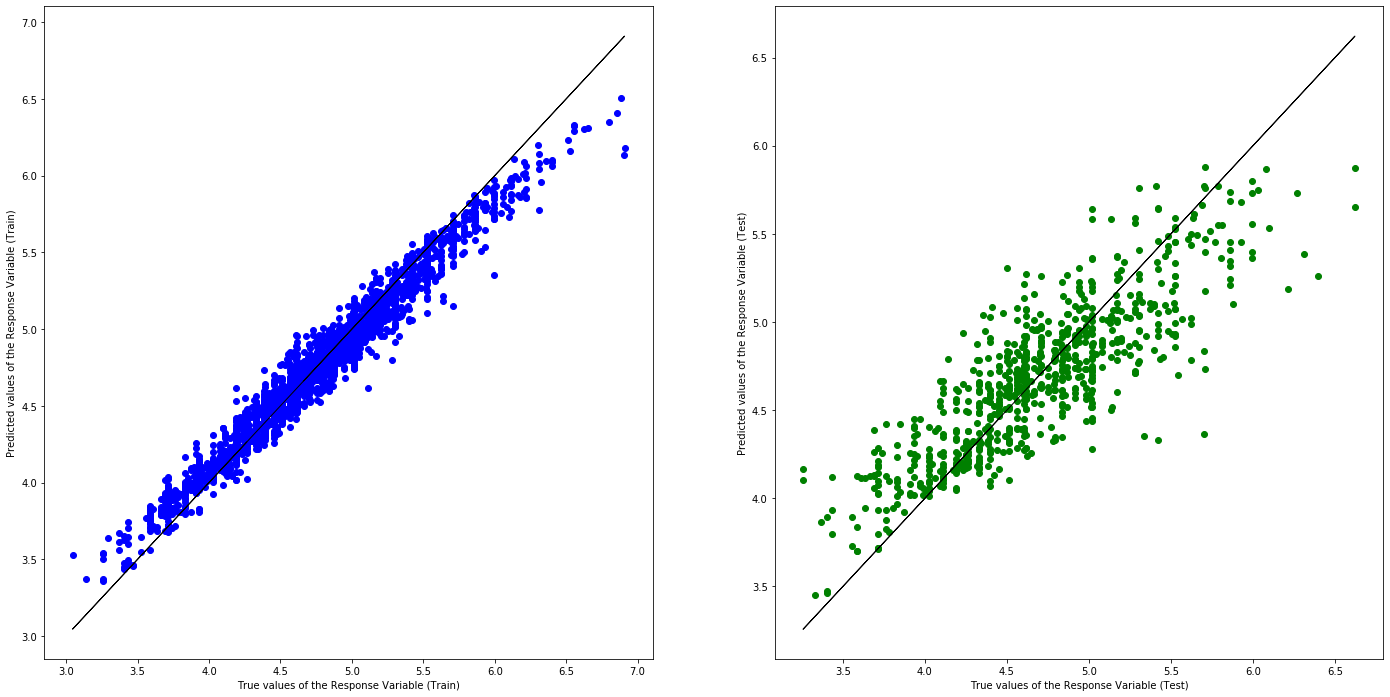

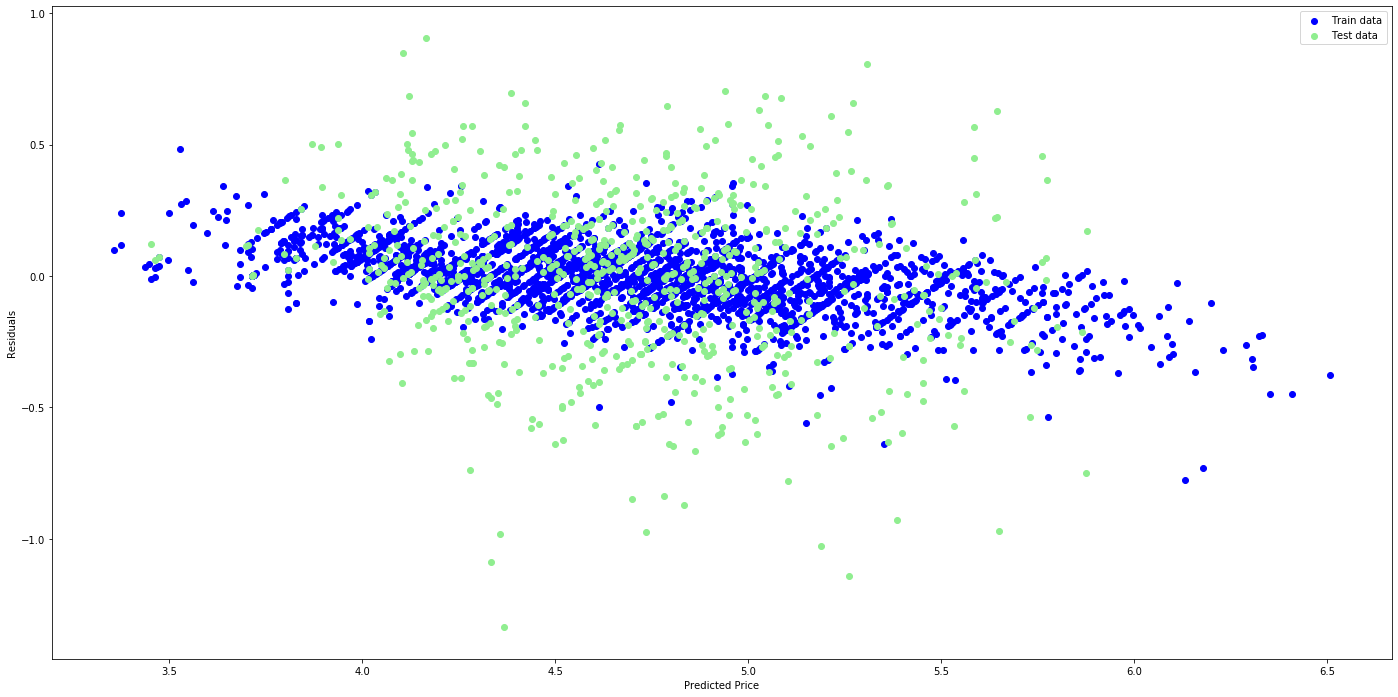

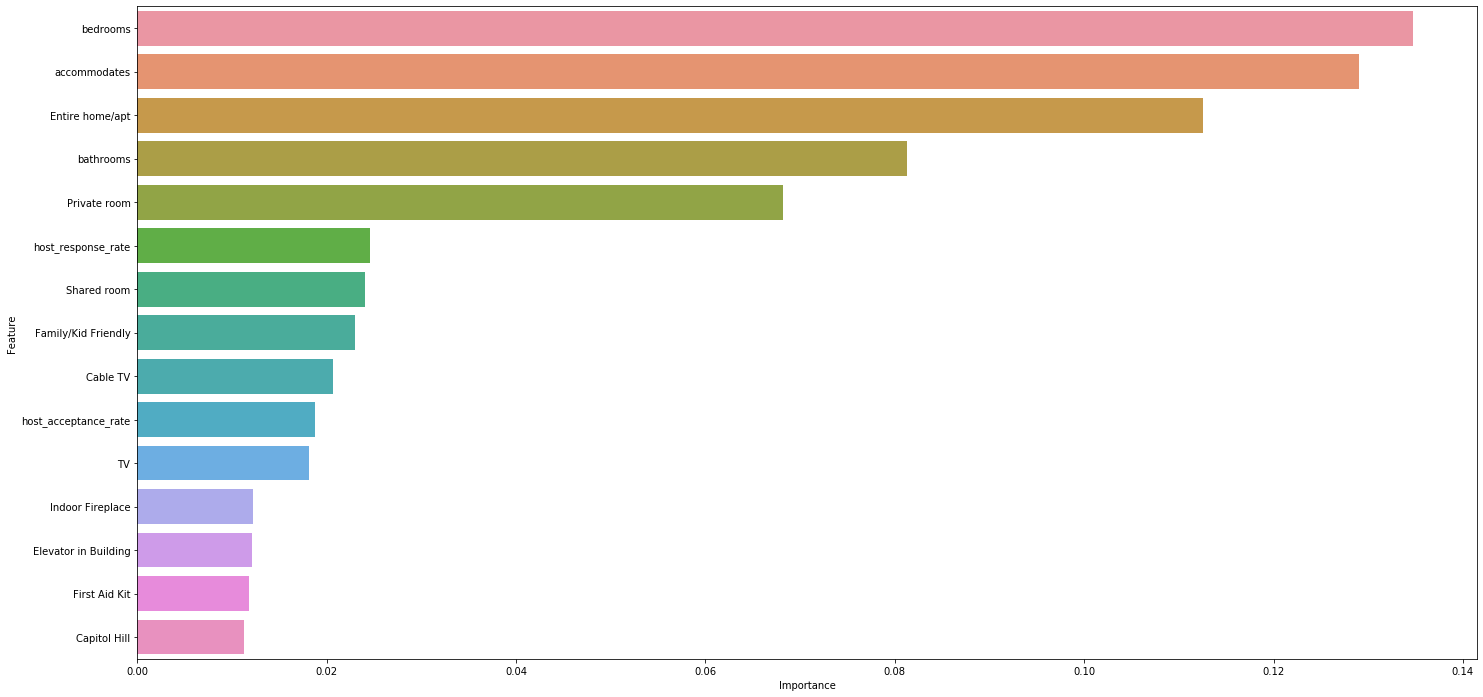

Explained Variance (R^2) on Train Set 	: 0.9570543871169807
Explained Variance (R^2) on Test Set 	: 0.7067707442972205


In [31]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

importances = pd.DataFrame({'Feature':x_train.columns, 'Importance':rf.feature_importances_})
importances = importances.sort_values('Importance',ascending=False)
plt.figure(figsize=(24,12))
sb.barplot( y = "Feature" , x= "Importance" , data = importances[0:15])
plt.show()

print("Explained Variance (R^2) on Train Set \t:", rf.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", rf.score(x_test, y_test))

# Gradient Boosting Regressor


In [33]:
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error


gbr = GradientBoostingRegressor(min_samples_split=400,
                                min_samples_leaf=50,
                                subsample=0.8,
                                random_state=1,
                               learning_rate=0.01,
                               max_features='sqrt')
param_grid = dict(n_estimators=[6000,7000], max_depth=[2,4,6])

grid_gbr=GridSearchCV(gbr, param_grid, cv=10, scoring='neg_mean_squared_error',n_jobs=2)

grid_gbr.fit(x_train,y_train)

gbr = grid_gbr.best_estimator_

y_test_pred = gbr.predict(x_test)
y_train_pred = gbr.predict(x_train)

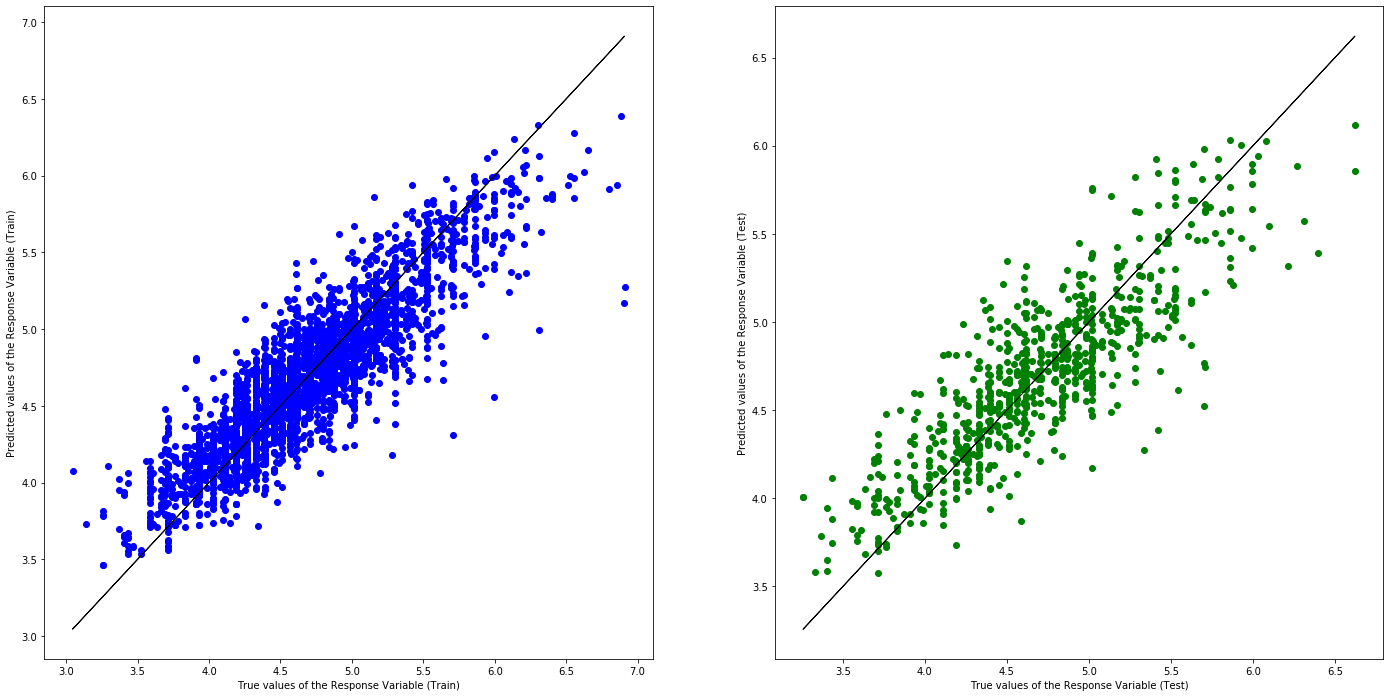

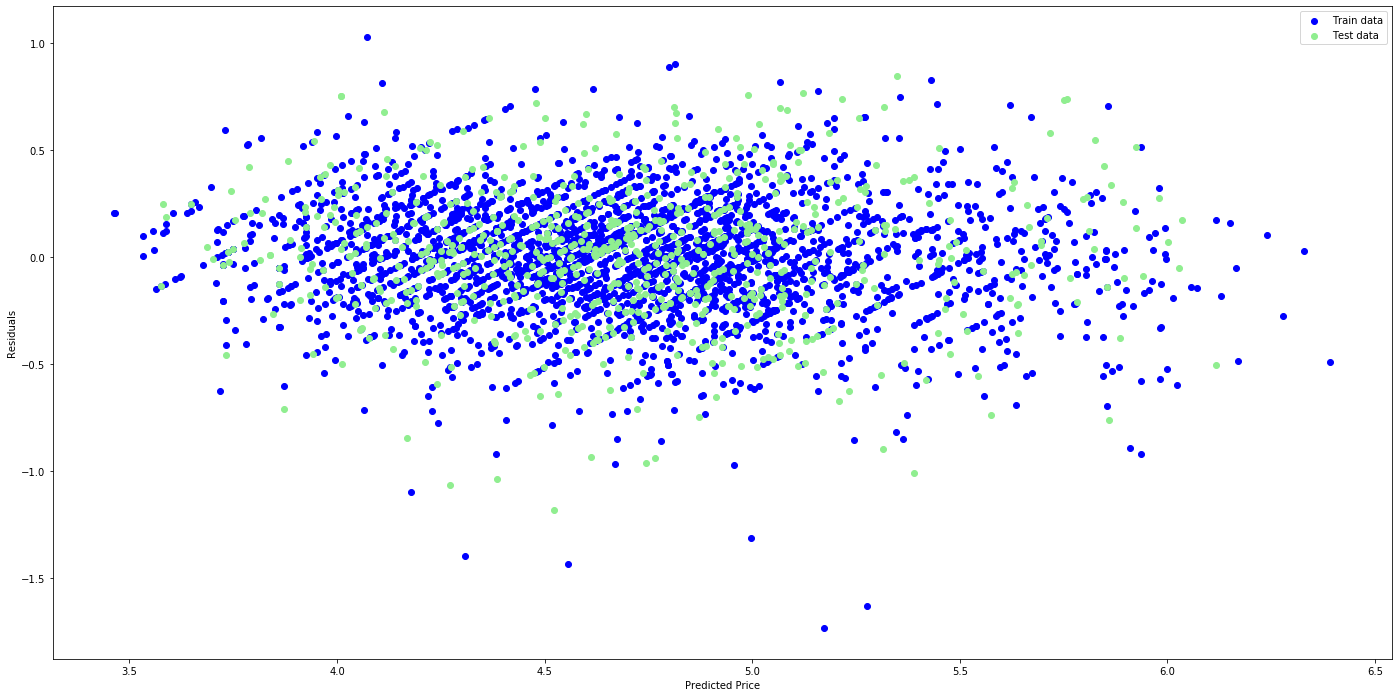

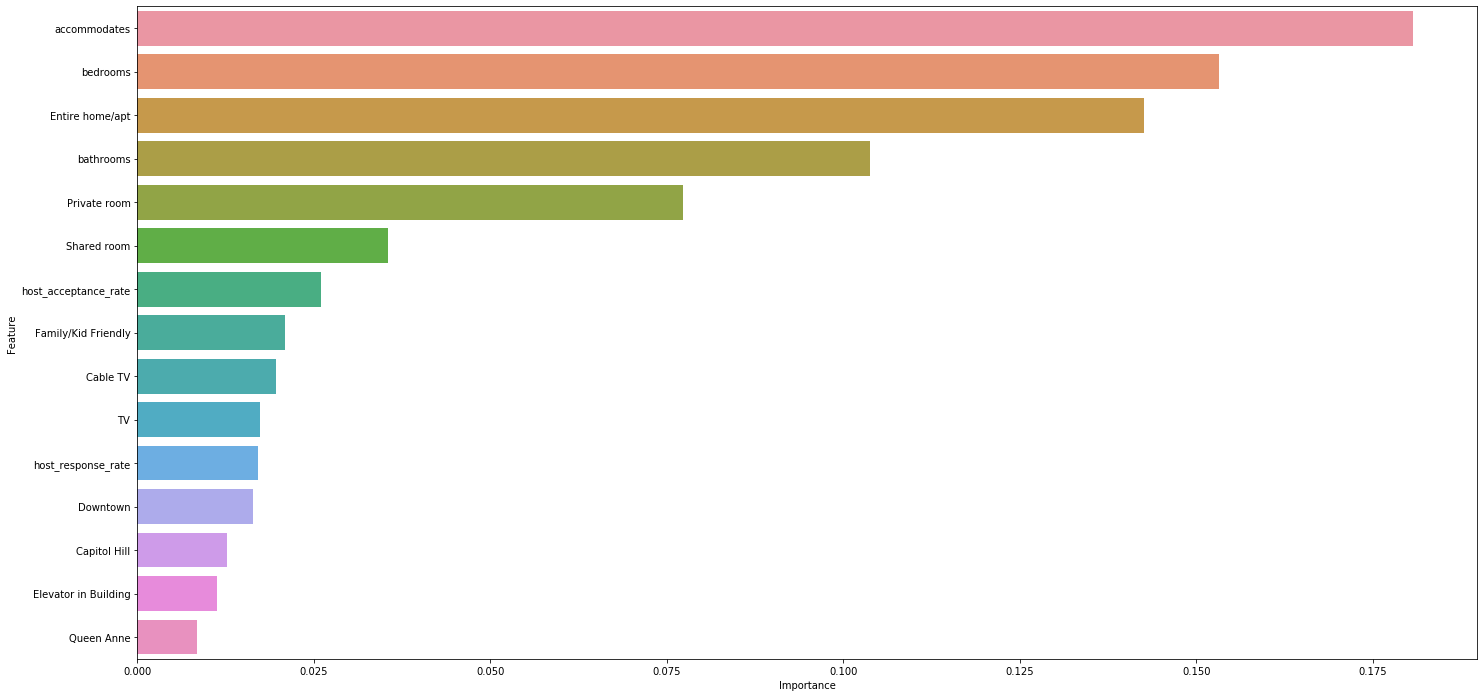

Explained Variance (R^2) on Train Set 	: 0.7861173807308939
Explained Variance (R^2) on Test Set 	: 0.7141218580204458


In [34]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.show()

importances = pd.DataFrame({'Feature':x_train.columns, 'Importance':gbr.feature_importances_})
importances = importances.sort_values('Importance',ascending=False)
plt.figure(figsize=(24,12))
sb.barplot( y = "Feature" , x= "Importance" , data = importances[0:15])
plt.show()

print("Explained Variance (R^2) on Train Set \t:", gbr.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", gbr.score(x_test, y_test))

In [35]:
import nltk
import string

data = pd.read_csv("data/reviews.csv")
comments = data['comments'].astype(str)

In [36]:
CONTRACTION_MAP = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how're": "how are",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have",
}

In [37]:
#Pre-Processing of Text 

#Expanding Contractions
import re
contractions_re = re.compile('(%s)' % '|'.join(CONTRACTION_MAP.keys()))
def expand_contractions(s, CONTRACTION_MAP=CONTRACTION_MAP):
    def replace(match):
         return CONTRACTION_MAP[match.group(0)]
    return contractions_re.sub(replace, s)

#Lower case
comments = comments.apply(lambda x: x.lower())

#Expanding Contractions
comments = comments.apply(expand_contractions)

#remove punctuation
comments = comments.apply(lambda x : x.translate(str.maketrans('', '', string.punctuation)))

#remove numbers
comments = comments.apply(lambda x : x.translate(str.maketrans('', '', string.digits)))


#remove stop words
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop = stopwords.words('english')
comments = comments.apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [ ]:
#Lemmazation with POS tagging

from nltk.corpus import wordnet
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV


lemma_function = WordNetLemmatizer()

def sentence_Lemmazation(sentence):
    tokens = word_tokenize(sentence)
    res_words = []
    for token, tag in pos_tag(tokens):
            res_words.append(lemma_function.lemmatize(token, tag_map[tag[0]]))
    return  " ".join(res_words)


comments = comments.apply(sentence_Lemmazation)  

In [ ]:
from wordcloud import WordCloud
# Display the generated image:
stop_words = ['seattle','downtown','bedroom','room',
              'kitchen','home','bed','house','apartment','bathroom','great','stay','place','us','would','host']
wordcloud = WordCloud(background_color="white",
                          width=800, height=800,
                          stopwords = stop_words,
                          collocations = False,
                         ).generate(' '.join(comments))
wordcloud.to_image()

In [ ]:
import collections

comments_count=[]
#getting name string from our list and using split function, later appending to list above
for sentence in comments:
    sentence_split = str(sentence).split()
    for word in sentence_split:
        comments_count.append(word)


comments_collections = collections.Counter(comments_count)
for x in stop_words:
    del comments_collections[x]
word_df = pd.DataFrame(comments_collections.most_common(20))
word_df.columns = ['word', 'counts']

In [ ]:
plt.figure(figsize=(25,6))
sb.barplot(x='word', y='counts', data=word_df)
plt.show()

## Calendar

In [ ]:
calendar_data = calendar.copy().dropna()
dates = calendar_data['date']
price = calendar_data['price']

dateofyear = {date: 0 for date in set(dates)}

months = ['Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016', 'Jul 2016', 'Aug 2016', 'Sep 2016',
          'Oct 2016','Nov 2016', 'Dec 2016','Jan 2017']

for date in dates:
    dateofyear[date] += 1

customersmonthly = np.zeros(12)
    
for date in dateofyear:
    customersmonthly[int(date.split('-')[1]) - 1] += dateofyear[date]

customersmonthly = [int(customers) for customers in customersmonthly]

for i, month in enumerate(customersmonthly):
    print("Number of customers in {:10s} : {:10d}".format( months[i], month))
print("\n")
print("Mean of Monthly customers for 2016:      " + str(int(np.mean(customersmonthly))))



In [ ]:
numberofyear = []

for i, date in enumerate(dateofyear.items()):
    numberofyear.append(date[1])

plt.figure(figsize=(25,5))
plt.plot(np.arange(1, len(numberofyear) + 1), numberofyear, color='magenta')
plt.title("Busiest times in year 2016", fontsize=20)
plt.xlabel("Month Year", fontsize=16)
plt.ylabel("Customers Count", fontsize=16)
plt.yticks(np.arange(1600, 3100, 200), fontsize=15)
plt.xticks(np.arange(1, 395, 31), months, fontsize=15)
plt.show()



In [ ]:
calendar_data['price']=calendar_data['price'].str.replace('$','')
calendar_data['price']=calendar_data['price'].str.replace(',','')
calendar_data['price']=calendar_data['price'].astype(float)
calendar_data=calendar_data.groupby('date')['price'].mean().reset_index()

plt.figure(figsize=(15,8))
plt.plot(np.arange(1, len(numberofyear) + 1),calendar_data['price'], color='magenta')
plt.title('Average price of Seattle Airbnb in 2016')
plt.xlabel('Month Year')
plt.ylabel('Average price')
plt.xticks(np.arange(1, 395, 31), months, fontsize=10)
plt.show()

In [ ]:
calendar_data['date']=pd.to_datetime(calendar_data['date'])
calendar_data['Dayofweek']=calendar_data['date'].dt.day_name()
plt.figure(figsize=(15, 8))
sb.boxplot(y = 'Dayofweek',  x = 'price', data = calendar_data, palette="Purples", width=0.6)
plt.show()

In [ ]:
linreg = LinearRegression()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
         'October', 'November', 'December']
y = np.array(customersmonthly)
X = np.array(np.arange(1, 13))
X = X[:, None]
y = y[:, None]

poly= PolynomialFeatures(5)
xpoly = poly.fit_transform(X)
rr = LinearRegression()
rr.fit(xpoly, y)

y_poly_pred = rr.predict(xpoly)

print("Polynomial Ridge Regression: 5 degree")
print("Coefficients and Intercept of the Linear Regression: \n")
print("Y = " + str([round(x,2) for x in rr.coef_[0]]) + "X + "+ str(round(rr.intercept_[0], 2)))

plt.figure(figsize=(15,5))
plt.scatter(X, y)
plt.plot(np.arange(1, len(y_poly_pred) + 1), y_poly_pred)
plt.plot(X, y_poly_pred, color="magenta")
plt.title("Prediction of customers in 2017", fontsize=20)
plt.xlabel("Months", fontsize=16)
plt.ylabel("Exact Customers Count", fontsize=16)
plt.yticks(np.arange(50000, 110000, 10000), fontsize=16)
plt.xticks(np.arange(1, 13), months, fontsize=12)
plt.show()

## Ratings

In [ ]:
listings['review_scores_rating'].skew()
reviewColumns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                      'review_scores_value']
for column in reviewColumns:
   listings = listings[listings[column].notna()]

In [ ]:
sb.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(20, 5))
ax = sb.violinplot(ax=ax,x=listings["review_scores_rating"])
plt.xlabel("Review Ratings", fontsize=16)

In [ ]:
fig, x2c = plt.subplots(figsize=(26, 5))
x2c = sb.countplot(ax=x2c,x=listings["review_scores_rating"])

In [ ]:
listings["review_scores_rating"].describe()

In [ ]:
listings=listings.sort_values(by=['neighbourhood_group_cleansed'])
neighNames=[]
neighRatings=[]
rating=0
counter=0
step=0
neigh=listings["neighbourhood_group_cleansed"]
ratings=listings["review_scores_rating"]
for x,y in zip(neigh,ratings):
    if x in neighNames:
        rating+=y
        counter=counter+1
        
    else:
        if(step==0):
            neighNames.append(x)
            rating+=y
            counter=counter+1
            
        else:
            neighRatings.append(rating/counter)
            neighNames.append(x)
            rating=y
            counter=1
            
else:
    neighRatings.append(rating/counter)
listings

In [ ]:
listingsSS=listings[['neighbourhood_group_cleansed','review_scores_rating']]
listingsG=listingsSS.groupby('neighbourhood_group_cleansed',as_index=False).mean().sort_values(by=['review_scores_rating'])
listingsLastTen=listingsG.nsmallest(10,['review_scores_rating'])
listingsLastTen

In [ ]:
plt.figure(figsize=(15,8))
plt.barh(listingsLastTen['neighbourhood_group_cleansed'],listingsLastTen['review_scores_rating'], color=['#cc99c9','#9ec1cf',  '#9ee09e', '#fdfd97','#feb144','#ff6663','#FF9AA2','#FFB7B2','#FFDAC1','#E2F0CB'])
plt.title('Average ratings by neighbourhood')
plt.xlabel('Average Ratings')
plt.ylabel('Neighbourhood')
plt.show()

In [ ]:
listings[['neighbourhood_group_cleansed','review_scores_rating']].dropna()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
colors=['#cc99c9','#9ec1cf','#9ee09e', '#fdfd97','#feb144','#ff6663','#FF9AA2','#FFB7B2','#FFDAC1','#E2F0CB']
colors=np.flip(colors)
listings2= listings[['neighbourhood_group_cleansed','review_scores_rating']].dropna()
f, axes = plt.subplots(10, 2, figsize=(25,60))
counter=0
for var in range(len(neighNames)):
    if(listingsLastTen["neighbourhood_group_cleansed"].str.contains(neighNames[var]).any()):
        df1=(listings2[listings['neighbourhood_group_cleansed'] == neighNames[var] ])
        ssb=sb.violinplot(ax=axes[counter,0],x=df1['review_scores_rating'],color=colors[counter])
        ssb.set(xlabel=[neighNames[var]])
        ssb2=sb.countplot(ax=axes[counter,1],x=df1['review_scores_rating'],color=colors[counter])
        ssb2.set(xlabel=[neighNames[var]])
        counter+=1

    

In [ ]:
from IPython.display import IFrame
IFrame(src='data/Calendar.html', width=1080, height=800)

## Predict Ratings

In [ ]:
sb.countplot(pd.qcut(listings['review_scores_rating'], q=3 , duplicates = 'drop'))

In [ ]:
rating_bin = pd.qcut(listings['review_scores_rating'], q=3 , duplicates = 'drop' , labels = [0,1,2])
pd.DataFrame(rating_bin)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

x =listings[["host_response_rate" , "host_acceptance_rate" , "host_is_superhost" , "accommodates", 
             "host_has_profile_pic","host_identity_verified","cancellation_policy","host_has_profile_pic","host_identity_verified"]]
# Extract Response and Predictors
y = rating_bin

amenitiesCol = []
for i in amenitiesCountDF['amenities_available']:
    if(type(i)!=str):
            break
    else:
            amenitiesCol.append(i)
amenitiesCol_df = pd.DataFrame(clean_listings[amenitiesCol])
x = x.join(amenitiesCol_df)

one_hot = pd.get_dummies(x['cancellation_policy'])
x = pd.concat([x,one_hot] , axis = 1)
x = x.drop(['cancellation_policy'] , axis=1)

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

y_test_pred = linreg.predict(x_test)
y_train_pred = linreg.predict(x_train)
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'black', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'black', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

plt.figure(figsize=(24,12))
plt.scatter(y_train_pred,  y_train_pred - y_train, c='blue', label='Train data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='lightgreen' , label='Test data')
plt.legend()
plt.xlabel('Predicted Price', fontsize=18)
plt.ylabel('Residuals')

plt.show()

print("Explained Variance (R^2) on Train Set \t:", linreg.score(x_train, y_train))
print("Explained Variance (R^2) on Test Set \t:", linreg.score(x_test, y_test))

In [ ]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

importances = pd.DataFrame({'Feature':x_train.columns, 'Importance':dectree.feature_importances_})
importances = importances.sort_values('Importance',ascending=False)
plt.figure(figsize=(24,12))
sb.barplot( y = "Feature" , x= "Importance" , data = importances[0:15])
plt.show()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(random_state=1, n_jobs=-1, max_features='sqrt', min_samples_leaf = 50)


param_grid = dict(n_estimators=[2000,3000,4000],
                  max_depth=[4,5],
                  criterion=['gini', 'entropy'])

grid_rfc =GridSearchCV(rfc, param_grid, cv=5)
grid_rfc.fit(x_train,y_train)


rfc = grid_rfc.best_estimator_

# Predict Response corresponding to Predictors
y_test_pred = rfc.predict(x_test)
y_train_pred = rfc.predict(x_train)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rfc.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rfc.score(x_test, y_test))
print()

importances = pd.DataFrame({'Feature':x_train.columns, 'Importance':rfc.feature_importances_})
importances = importances.sort_values('Importance',ascending=False)
plt.figure(figsize=(24,12))
sb.barplot( y = "Feature" , x= "Importance" , data = importances[0:15])
plt.show()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])